# Import Important Libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
%run utils.ipynb import read_data, preprocess_data

## Train different Machine Learning Algorithms candidates with their default hyperparameters to choose the best one of them as the final Model

In [38]:
# Preprocess training data and divide it into features columns and target column
train = read_data('train')
train = preprocess_data(train, 'train')
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']

#### Instaniate different machine learning algorithms

In [39]:
# Adaboost Classifier
adaboost_clf = AdaBoostClassifier(random_state=42)
# GaussianNB Classifier
gaussian_nb_clf = GaussianNB()
# KNN Classifier
knn = KNeighborsClassifier()
# SVM Classifier
svm_clf = SVC(random_state=42)
# LogisticRegression Classifier
logistic_regression_cl = LogisticRegression(random_state=42)

#### Perfrom K fold cross validation 

In [40]:
# list of accuracy score of each classifier
clf_accuracy = []
# dictionary contains the name of each classifer and the calssifer itself
classifiers = {'AdaBoost':adaboost_clf,'GaussianNB':gaussian_nb_clf,'KNN':knn,'SVM':svm_clf,'LogisticRegression':logistic_regression_cl}
# cross validation part for each algorithm
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
for clf in classifiers.values():
    clf_results = cross_val_score(estimator=clf,X=X_train,y=y_train,scoring='accuracy',cv=kfold)
    clf_accuracy.append(clf_results[-1])

#### Visualize and compare each classifier score

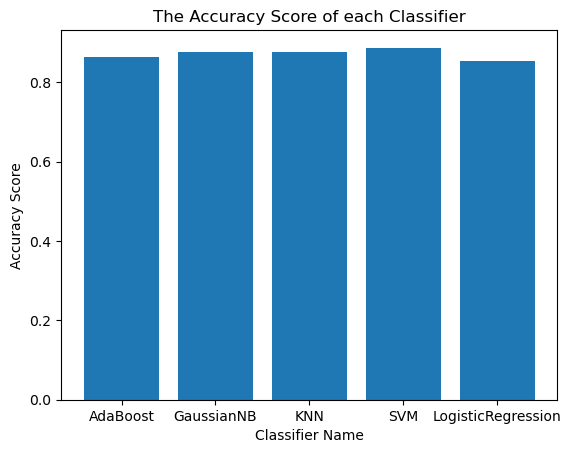

In [41]:
plt.bar(x=classifiers.keys(),height=clf_accuracy)
plt.title('The Accuracy Score of each Classifier')
plt.xlabel('Classifier Name')
plt.ylabel('Accuracy Score')
plt.show()

#### From graph we see that SVM has the highest Accuracy Score, so it will be our final model

## Hyperparameter tuning for the best model using GridSearchCV

In [42]:
# parameters grid of SVM classifer
params_grid = {'C':[0.1,0.6,2,8]
              ,'kernel':['linear','poly','rbf']}
# score method
score = make_scorer(accuracy_score)
# extract best_estimator from gridsearch as it will be our best classifier
grid_search_object = GridSearchCV(estimator=svm_clf,param_grid=params_grid,scoring=score)
grid_fit = grid_search_object.fit(X_train,y_train)
best_clf = grid_fit.best_estimator_

## Predict the Test Data

In [43]:
# Preprocess Test Data then predict it
test = read_data('test')
X_test = preprocess_data(test, 'test')
y_pred = best_clf.predict(X_test)

## Convert predictions into a CSV file

In [55]:
# convert predictions into a dataframe
survived = pd.DataFrame(y_pred,columns=['Survived'])
PassngerId = test[['PassengerId']]
## create submission file
submission = pd.concat([PassngerId, survived],axis=1)
submission.to_csv('Submission.csv',index=False)